In [54]:
#!pip install hdfs
!pip install pyarrow

Defaulting to user installation because normal site-packages is not writeable
--- Logging error ---
Traceback (most recent call last):
  File "/home/osbdet/.local/lib/python3.9/site-packages/pip/_internal/utils/logging.py", line 177, in emit
    self.console.print(renderable, overflow="ignore", crop=False, style=style)
  File "/home/osbdet/.local/lib/python3.9/site-packages/pip/_vendor/rich/console.py", line 1673, in print
    extend(render(renderable, render_options))
  File "/home/osbdet/.local/lib/python3.9/site-packages/pip/_vendor/rich/console.py", line 1305, in render
    for render_output in iter_render:
  File "/home/osbdet/.local/lib/python3.9/site-packages/pip/_internal/utils/logging.py", line 134, in __rich_console__
    for line in lines:
  File "/home/osbdet/.local/lib/python3.9/site-packages/pip/_vendor/rich/segment.py", line 249, in split_lines
    for segment in segments:
  File "/home/osbdet/.local/lib/python3.9/site-packages/pip/_vendor/rich/console.py", line 1283, in

In [74]:
import pytrends
from hdfs import Config
import pandas as pd
import pyarrow as pa 
import os

In [75]:
client = Config().get_client('/data/hdfs')
#https://hdfscli.readthedocs.io/en/latest/quickstart.html

HdfsError: Alias 'hdfs://localhost:9000' not found in '/home/osbdet/.hdfscli.cfg'.

In [69]:
# Get the default alias' client.
client = InsecureClient('hdfs://localhost:9000', user='osbdet')

In [70]:
# Creating a simple Pandas DataFrame
liste_hello = ['hello1','hello2']
liste_world = ['world1','world2']
df = pd.DataFrame(data = {'hello' : liste_hello, 'world': liste_world})
 
# Writing Dataframe to hdfs
with client_hdfs.write('helloworld.csv', encoding = 'utf-8') as writer:
  df.to_csv(writer)

InvalidSchema: No connection adapters were found for 'hdfs://localhost:9000/datalake/raw/write_test/webhdfs/v1/'

In [47]:
from pytrends.request import TrendReq

pytrends = TrendReq(hl='en-US', tz=360) 

In [48]:
kw_list = ["bad bunny", "badbunny", "#badbunny"] # list of keywords to get data 

pytrends.build_payload(kw_list, cat=0, timeframe='today 1-m') 

In [36]:
data = pytrends.interest_over_time() 
data = data.reset_index() 


import plotly.express as px

fig = px.line(data, x="date", y=['bad bunny'], title='Keyword Web Search Interest Over Time')
fig.show() 

In [40]:
data  = pytrends.related_queries()
data['bad bunny']['top']

,query,value
0,bad bunny la,100
1,bad bunny 2022,80
2,concierto bad bunny,65
3,bad bunny concert,63
4,bad bunny lyrics,50
5,bad bunny adidas,40
6,bad bunny tour,34
7,concierto de bad bunny,33
8,bad bunny tickets,32
9,bad bunny chile,29


In [13]:
import findspark
findspark.init()

In [14]:
import pandas as pd
pd.set_option('display.max_colwidth', None)

In [15]:
import os
os.environ['PYSPARK_SUBMIT_ARGS'] = '--packages "graphframes:graphframes:0.8.2-spark3.2-s_2.12" --jars /opt/hive3/lib/hive-hcatalog-core-3.1.2.jar pyspark-shell'

In [14]:
from pyspark.sql.session import SparkSession

spark = (SparkSession.builder
    .appName("Google-Trends")
    .enableHiveSupport()
    .getOrCreate())

:: loading settings :: url = jar:file:/opt/spark3/jars/ivy-2.5.0.jar!/org/apache/ivy/core/settings/ivysettings.xml


Ivy Default Cache set to: /home/osbdet/.ivy2/cache
The jars for the packages stored in: /home/osbdet/.ivy2/jars
graphframes#graphframes added as a dependency
:: resolving dependencies :: org.apache.spark#spark-submit-parent-90abc928-c399-4b62-a491-4b5191859e31;1.0
	confs: [default]
	found graphframes#graphframes;0.8.2-spark3.2-s_2.12 in spark-packages
	found org.slf4j#slf4j-api;1.7.16 in central
:: resolution report :: resolve 614ms :: artifacts dl 21ms
	:: modules in use:
	graphframes#graphframes;0.8.2-spark3.2-s_2.12 from spark-packages in [default]
	org.slf4j#slf4j-api;1.7.16 from central in [default]
	---------------------------------------------------------------------
	|                  |            modules            ||   artifacts   |
	|       conf       | number| search|dwnlded|evicted|| number|dwnlded|
	---------------------------------------------------------------------
	|      default     |   2   |   0   |   0   |   0   ||   2   |   0   |
	--------------------------------

In [15]:
data

{'espn fantasy basketball': {'top':                                    query  value
  0            fantasy basketball rankings    100
  1       espn fantasy basketball rankings    100
  2     espn fantasy basketball mock draft     45
  3                  espn fantasy football     44
  4               yahoo fantasy basketball     32
  5  espn fantasy basketball rankings 2023     18,
  'rising':                                 query   value
  0            yahoo fantasy basketball  605750
  1  espn fantasy basketball mock draft      50}}

In [16]:
import pandas as pd                        
from pytrends.request import TrendReq
pytrend = TrendReq()

<AxesSubplot:xlabel='geoName'>

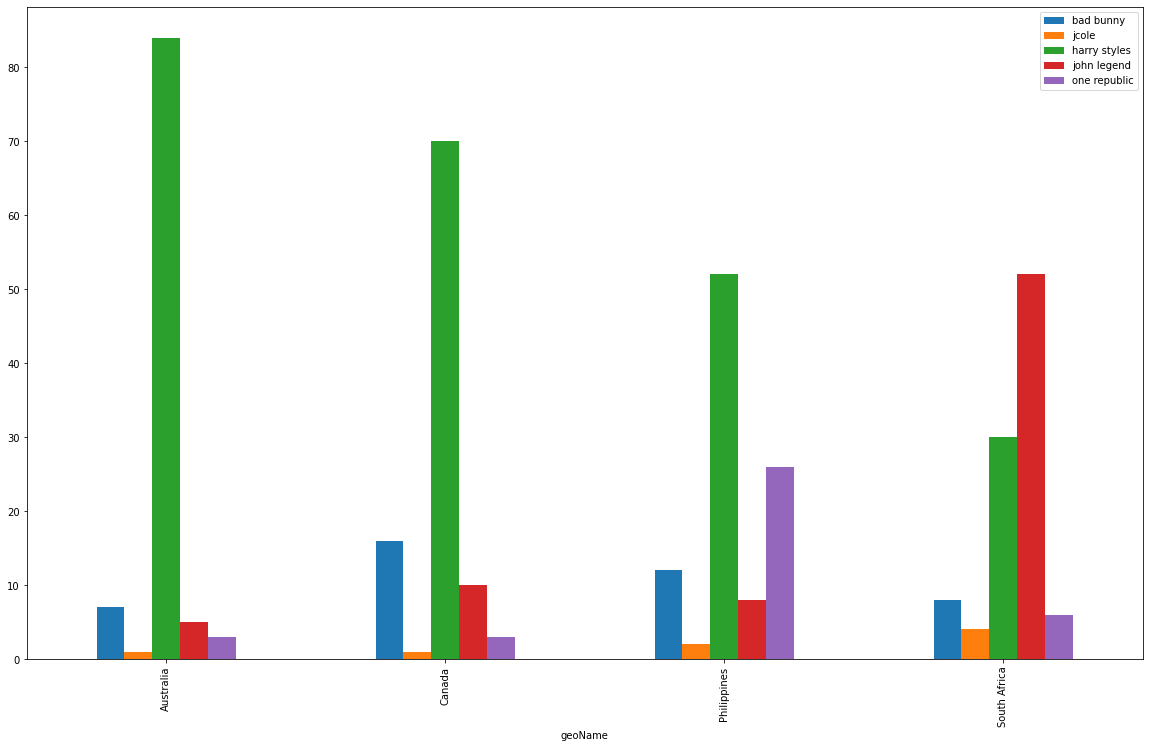

In [18]:
#provide your search terms
kw_list=['bad bunny', 'jcole', 'harry styles', 'john legend','one republic']

#search interest per region
#run model for keywords (can also be competitors)
pytrend.build_payload(kw_list, timeframe='today 1-m')

# Interest by Region
regiondf = pytrend.interest_by_region()
#looking at rows where all values are not equal to 0
regiondf = regiondf[(regiondf != 0).all(1)]

#drop all rows that have null values in all columns
regiondf.dropna(how='all',axis=0, inplace=True)

#visualise
regiondf.plot(figsize=(20, 12), y=kw_list, kind ='bar')

In [19]:
regiondf

,bad bunny,jcole,harry styles,john legend,one republic
geoName,,,,,
Australia,7,1,84,5,3
Canada,16,1,70,10,3
Philippines,12,2,52,8,26
South Africa,8,4,30,52,6


In [20]:
import pyspark.sql.functions as f
import pandas as pd

In [21]:
regiondf.write.save('hdfs:////datalake/raw/gtrends', format='csv', mode='append')

AttributeError: 'DataFrame' object has no attribute 'write'

In [22]:
pytrends.trending_searches(pn='united_states')

,0
0,Warriors
1,Najee Harris
2,Arshad Sharif
3,Justin Verlander
4,Dallas Cowboys
5,World Series 2022
6,Bryce Harper
7,Lakers
8,Raiders
9,Washington Commanders


In [42]:
pytrends.trending_searches(pn='germany')

,0
0,Lewentz
1,Ölpipeline Druschba
2,Alfons schuhbecks
3,Victor Steeman
4,NVIDIA
5,BVB
6,Angela Lansbury gestorben
7,RB Leipzig
8,Mbappe
9,Amazon Prime Day


In [25]:
pytrends.top_charts(date, hl='en-US', tz=300, geo='GLOBAL')

NameError: name 'date' is not defined